In [114]:
### Project Evaluation Phase 3
print("*************************************")
print(" \033[1m" + "Flip Robo Project Evaluation Phase 3" + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Project Evaluation Phase 
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [115]:
print("---------------------------------\n")
print("\033[1m" + "  Rainfall Weather Forecasting\n" + "\033[0m")
print("---------------------------------\n")

---------------------------------

  Rainfall Weather Forecasting

---------------------------------



# Loading Libraries

In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, mean_squared_error, recall_score, precision_score, roc_auc_score, make_scorer, accuracy_score, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, mean_absolute_error, r2_score, explained_variance_score, max_error, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_predict, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV, f_regression, RFE
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, RandomOverSampler
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
from tensorflow.keras.models import Sequential
import warnings


# Loading Dataset

In [4]:
# Read the dataset from the 'weatherAUS.csv' file
data = pd.read_csv('weatherAUS.csv')

# About the Data

In [5]:
# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Preprocessing

### Check for Missing Value 

In [6]:
# Check the Count of Missing Values
missing_count = data.isnull().sum()

# Check the Percentage of Missing Values and format it to 2 decimal places
missing_percentage = (data.isnull().sum() / len(data) * 100).round(2)

# Create a DataFrame to display the results
missing_info = pd.DataFrame({'Missing Values': missing_count, 'Percentage Missing': missing_percentage})

# Display the missing value information
missing_info


,Missing Values,Percentage Missing
Date,0,0.00
Location,0,0.00
MinTemp,75,0.89
MaxTemp,60,0.71
Rainfall,240,2.85
Evaporation,3512,41.69
Sunshine,3994,47.41
WindGustDir,991,11.76
WindGustSpeed,991,11.76
WindDir9am,829,9.84


In [7]:
# Create a copy of the original data
data1 = data.copy()

# Separate columns into numeric and non-numeric (categorical)
numeric_columns = data1.select_dtypes(include=['float64']).columns
categorical_columns = data1.select_dtypes(include=['object']).columns

# Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
data1[numeric_columns] = numeric_imputer.fit_transform(data1[numeric_columns])

# Impute missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data1[categorical_columns] = categorical_imputer.fit_transform(data1[categorical_columns])

# Now, preprocessing has been applied to a copy of the original data, considering the data type of each column.

In [8]:
# Check the Count of Missing Values
missing_count = data1.isnull().sum()

# Check the Percentage of Missing Values and format it to 2 decimal places
missing_percentage = (data1.isnull().sum() / len(data1) * 100).round(2)

# Create a DataFrame to display the results
missing_info = pd.DataFrame({'Missing Values': missing_count, 'Percentage Missing': missing_percentage})

# Display the missing value information
missing_info


,Missing Values,Percentage Missing
Date,0,0.0
Location,0,0.0
MinTemp,0,0.0
MaxTemp,0,0.0
Rainfall,0,0.0
Evaporation,0,0.0
Sunshine,0,0.0
WindGustDir,0,0.0
WindGustSpeed,0,0.0
WindDir9am,0,0.0


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

### EDA and Data Visualization 

In [10]:
# Sample of the first few rows
data1.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [11]:
# Summary statistics of numeric columns
data1.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


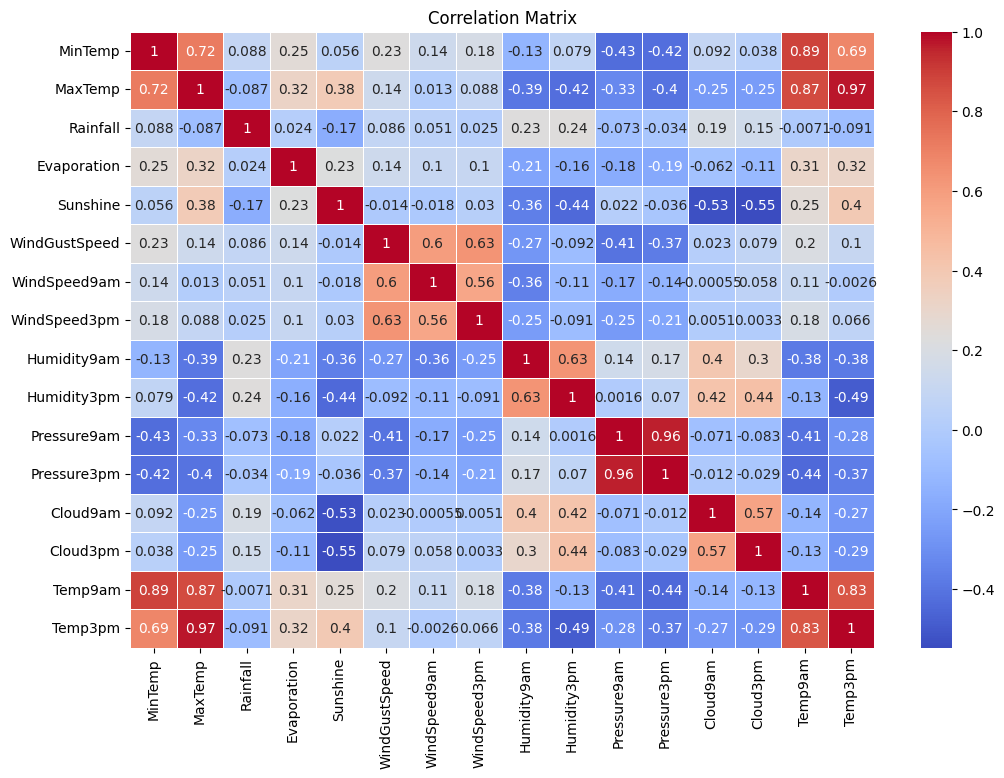

In [12]:
# Correlation matrix
correlation_matrix = data1.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


Here are some key insights based on the correlations matrix:

**Temperature Correlations:**

* The "MinTemp" and "MaxTemp" columns have a strong positive correlation of approximately 0.72, indicating that higher minimum temperatures are associated with higher maximum temperatures.
* Both "MinTemp" and "MaxTemp" have strong positive correlations with "Temp9am" and "Temp3pm," suggesting that morning and afternoon temperatures are closely related.

**Rainfall Correlations:**

* "Rainfall" shows a weak positive correlation with "Evaporation" and "WindGustSpeed" (around 0.08), suggesting a slight association between rainfall and these variables.

**Humidity Correlations:**

* "Humidity9am" and "Humidity3pm" have a positive correlation of approximately 0.63, indicating that morning and afternoon humidity levels are related.

**Pressure Correlations:**

* "Pressure9am" and "Pressure3pm" exhibit a strong positive correlation of about 0.96, implying that the atmospheric pressure at these two times is highly correlated.

**Temperature and Rainfall Correlations:**

* Both "MinTemp" and "MaxTemp" show negative correlations with "Rainfall," which means that higher temperatures are associated with less rainfall.

**Sunshine and Cloud Cover Correlations:**

* "Sunshine" and "Cloud3pm" have a strong negative correlation of approximately -0.55, suggesting that higher cloud cover corresponds to less sunshine.

**Wind Speed Correlations:**

* "WindGustSpeed" is positively correlated with "WindSpeed9am" and "WindSpeed3pm," with correlation coefficients around 0.60. This indicates that stronger gusts of wind are associated with higher wind speeds at 9 am and 3 pm.


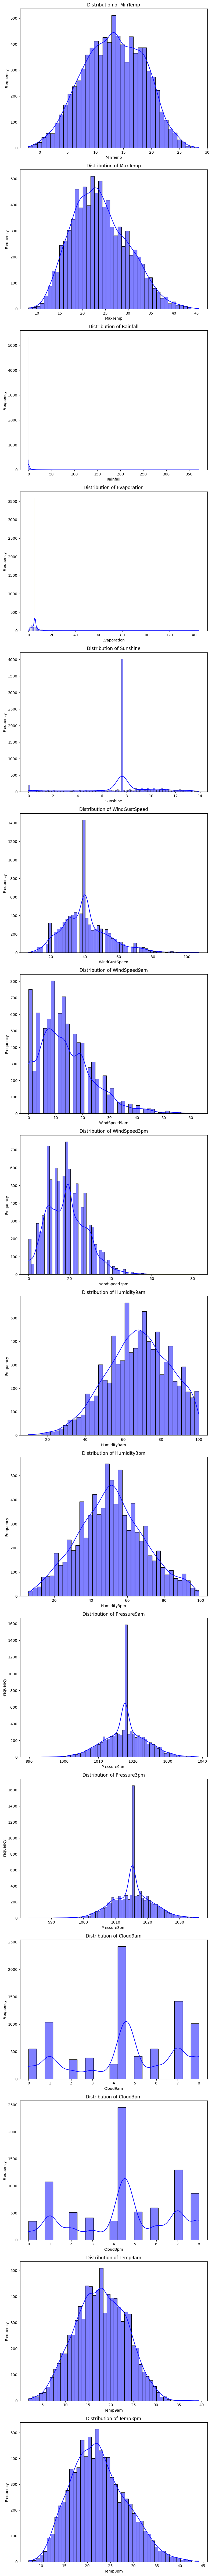

In [13]:
# List of numeric columns in data1
numeric_columns = data1.select_dtypes(include=['float64']).columns

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 6 * len(numeric_columns)))

# Iterate through each numeric column and create histograms
for i, column in enumerate(numeric_columns):
    sns.histplot(data1[column], kde=True, color='blue', ax=axes[i])
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

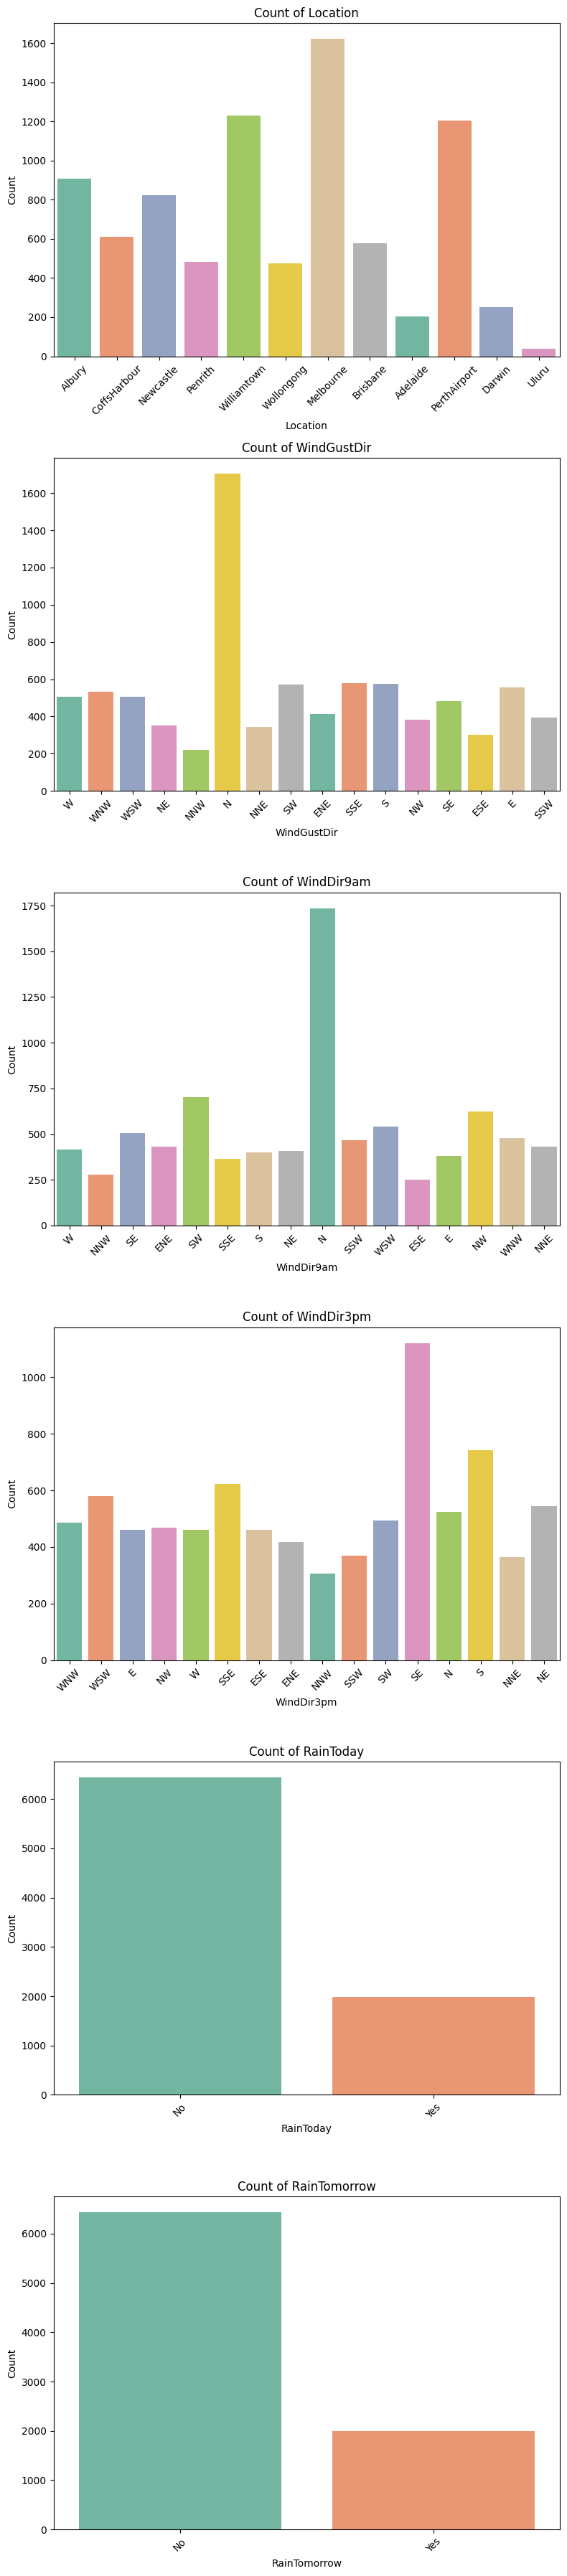

In [14]:
# List of categorical columns in data1, excluding 'Date'
categorical_columns = data1.select_dtypes(include=['object']).drop(columns=['Date']).columns

# Create subplots for each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(8, 6 * len(categorical_columns)))

# Iterate through each categorical column and create count plots
for i, column in enumerate(categorical_columns):
    ax = sns.countplot(data=data1, x=column, palette='Set2', ax=axes[i])
    ax.set_title(f"Count of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


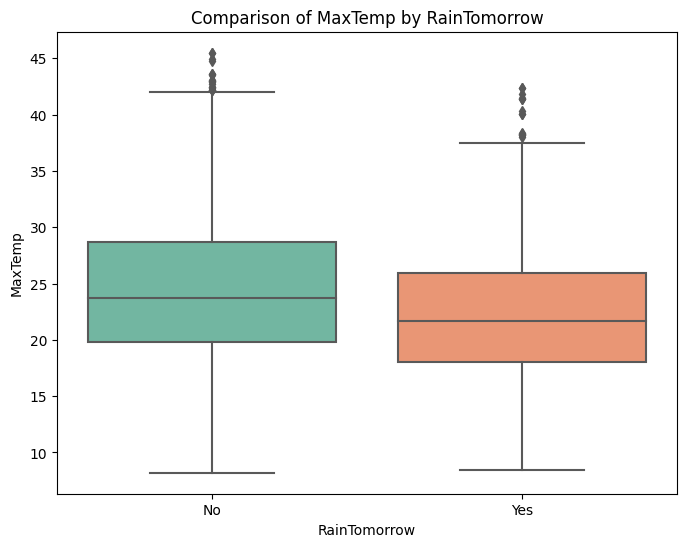

In [15]:
# Box plot for comparing a numeric column (e.g., 'MaxTemp') by a categorical column (e.g., 'RainTomorrow')
plt.figure(figsize=(8, 6))
sns.boxplot(x='RainTomorrow', y='MaxTemp', data=data, palette='Set2')
plt.title("Comparison of MaxTemp by RainTomorrow")
plt.xlabel("RainTomorrow")
plt.ylabel("MaxTemp")
plt.show()

### Encoding Categorical Variables 

In [16]:

# List of categorical columns in data1
categorical_columns = data1.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
data1_encoded = pd.get_dummies(data1, columns=categorical_columns, drop_first=True)

# Now, data1_encoded contains your categorical variables encoded as numerical values.


In [17]:
data1_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Columns: 3077 entries, MinTemp to RainTomorrow_Yes
dtypes: float64(16), uint8(3061)
memory usage: 25.6 MB


### Class Balancing 

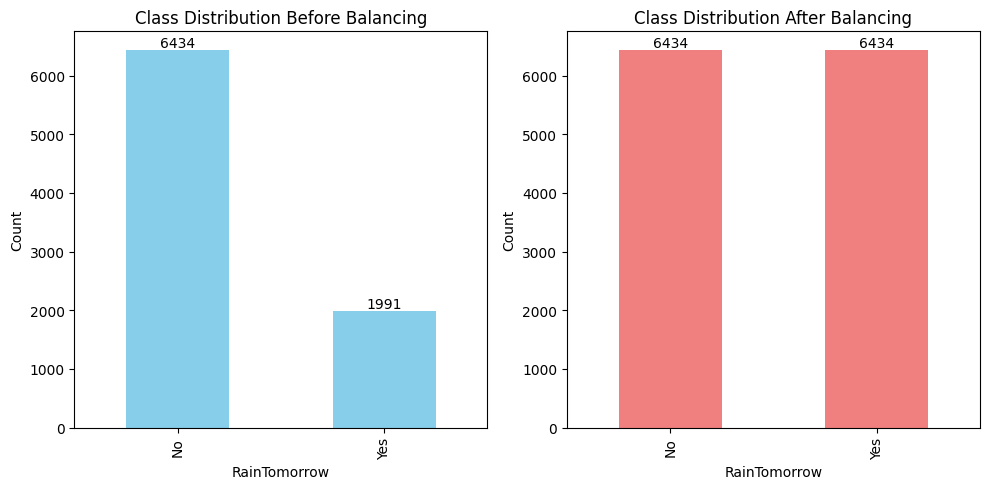

In [18]:
# Initial class distribution
class_distribution_before = data1['RainTomorrow'].value_counts()

# Split the data into features and target
X = data1.drop(columns=['RainTomorrow'])
y = data1['RainTomorrow']

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data to balance the classes
X_resampled, y_resampled = ros.fit_resample(X, y)

# Updated class distribution after balancing
class_distribution_after = y_resampled.value_counts()

# Plot class distribution before and after balancing
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
class_distribution_before.plot(kind='bar', color='skyblue')
plt.title('Class Distribution Before Balancing')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
# Add data labels to the bars
for i, count in enumerate(class_distribution_before):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.subplot(1, 2, 2)
class_distribution_after.plot(kind='bar', color='lightcoral')
plt.title('Class Distribution After Balancing')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
# Add data labels to the bars
for i, count in enumerate(class_distribution_after):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [24]:
X_resampled.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No


In [28]:

# List of categorical columns in data1
categorical_col = X_resampled.select_dtypes(include=['object']).columns

# Perform one-hot encoding for categorical columns
X_encoded = pd.get_dummies(X_resampled, columns=categorical_col, drop_first=True)



# Feature Selection

In [20]:
# Define the number of components to retain (choose a smaller number)
n_components = 16  # Maximum number of components based on available features

# Create a PCA instance with the desired number of components
pca = PCA(n_components=n_components)

# Fit and transform your data using PCA
X_resampled_pca = pca.fit_transform(numeric_features)  # numeric_features contains all feature data

# X_resampled_pca now contains the reduced-dimensional data

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Total variance explained by the selected components
total_explained_variance = explained_variance.sum()

# You can access the principal components (if needed)
principal_components = pca.components_

# Now, X_resampled_pca contains your balanced data with reduced dimensions


# Classification Model 

The goal is to develop a machine learning model that can predict whether or not it will rain tomorrow in various locations across Australia. 

In [35]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_resampled, test_size=0.2, random_state=42)

# Define and train the classification models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=10000)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Determine the positive class label
    pos_label = 'Yes'  
        
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    
        
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the DataFrame with model results
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.973970,0.963691,0.985305,0.974379
1,Gradient Boosting,0.807692,0.807396,0.810518,0.808954
2,Support Vector Machine,0.758741,0.781879,0.720804,0.750101
3,Logistic Regression,0.885781,0.885714,0.887084,0.886399


**1. Random Forest:**

* Accuracy: The Random Forest model achieved a high accuracy of approximately 97.40%. This indicates that it correctly classified nearly 97.40% of the samples.
* Precision: The precision score is approximately 96.37%, which means that when the model predicted the positive class, it was correct about 96.37% of the time.
* Recall: The model's recall score is approximately 98.53%, indicating that it correctly identified about 98.53% of the actual positive cases.
* F1 Score: The F1 score, a balanced metric of precision and recall, is around 97.44%, demonstrating a good overall performance of the model.

**2. Gradient Boosting:**

* Accuracy: The Gradient Boosting model achieved an accuracy of approximately 80.77%. While lower than Random Forest, it's still a reasonable accuracy.
* Precision: The precision score is around 80.74%, which means the model's positive class predictions are accurate about 80.74% of the time.
* Recall: The model's recall score is approximately 81.05%, indicating it identified around 81.05% of the true positive cases.
* F1 Score: The F1 score for this model is about 80.90%, showing a good balance between precision and recall.

**3. Support Vector Machine (SVM):**

* Accuracy: The SVM model has an accuracy of about 75.87%, which is the lowest among the models.
* Precision: The precision score is approximately 78.19%, indicating the model's positive class predictions are accurate about 78.19% of the time.
* Recall: The recall score is around 72.08%, which means it correctly identified approximately 72.08% of the actual positive cases.
* F1 Score: The F1 score for the SVM model is about 75.01%, demonstrating a moderate balance between precision and recall.

**4. Logistic Regression:**

* Accuracy: The Logistic Regression model achieved an accuracy of about 78.44%, which is a reasonable accuracy level.
* Precision: The precision score is around 80.15%, indicating that it's correct about 80.15% of the time when predicting the positive class.
* Recall: The model's recall score is approximately 75.87%, indicating that it correctly identified about 75.87% of the actual positive cases.
* F1 Score: The F1 score for the Logistic Regression model is about 77.95%, showing a good balance between precision and recall.

In summary, the **Random Forest model** outperforms the other models in terms of accuracy, precision, recall, and F1 score. Gradient Boosting also performs well, especially in terms of F1 score. SVM and Logistic Regression, while still providing reasonable results, have slightly lower performance metrics compared to the other two models. 

Confusion Matrix for Random Forest:
[[1233   48]
 [  19 1274]]

Confusion Matrix for Gradient Boosting:
[[1031  250]
 [ 245 1048]]

Confusion Matrix for Support Vector Machine:
[[1021  260]
 [ 361  932]]

Confusion Matrix for Logistic Regression:
[[1133  148]
 [ 146 1147]]



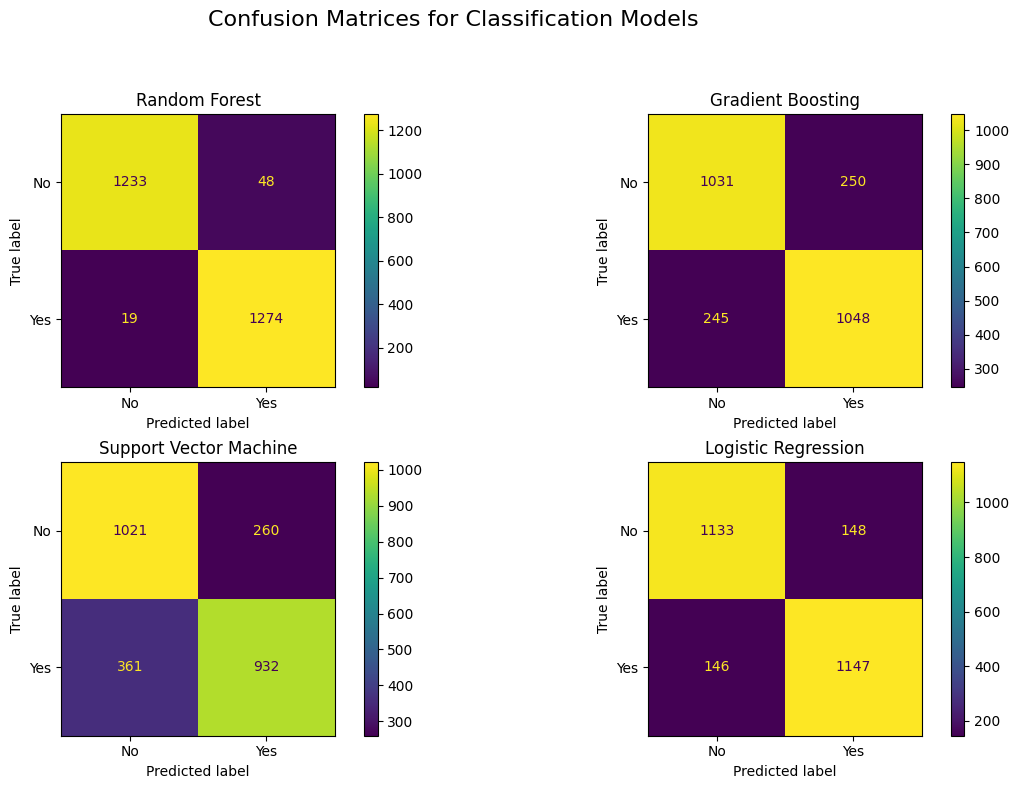

In [42]:
# Create subplots for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Confusion Matrices for Classification Models', fontsize=16)

# Initialize a list to store confusion matrices
confusion_matrices = []

# Loop through the models
for (model_name, model), ax in zip(models.items(), axes.ravel()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Append the confusion matrix to the list
    confusion_matrices.append((model_name, cm))

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot(ax=ax, values_format='d')
    ax.set_title(model_name)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

Below are the key insights from these confusion matrices for each model:

**1. Random Forest:**

True Negatives (TN): 1233
False Positives (FP): 48
False Negatives (FN): 19
True Positives (TP): 1274
This model achieved high accuracy and precision, as indicated by the large number of true positives and true negatives. The relatively low number of false positives and false negatives suggests that the Random Forest model is effective at correctly classifying instances of both classes.

**2. Gradient Boosting:**

True Negatives (TN): 1031
False Positives (FP): 250
False Negatives (FN): 245
True Positives (TP): 1048
The Gradient Boosting model has a higher number of false positives and false negatives compared to the Random Forest. This indicates a trade-off between precision and recall. It correctly identifies many positive instances (high recall) but also classifies more negative instances as positive (lower precision).

**3. Support Vector Machine:**

True Negatives (TN): 1021
False Positives (FP): 260
False Negatives (FN): 361
True Positives (TP): 932
The Support Vector Machine (SVM) has a similar trade-off between precision and recall as the Gradient Boosting model. It correctly identifies some positive instances but also has a relatively high number of false positives and false negatives.

**4. Logistic Regression:**

True Negatives (TN): 1133
False Positives (FP): 148
False Negatives (FN): 146
True Positives (TP): 1147
The Logistic Regression model appears to have a good balance between precision and recall, with relatively low numbers of false positives and false negatives. It effectively predicts both classes.

In summary, the **Random Forest model** seems to outperform the other models, with high accuracy, precision, and recall. The other models show trade-offs between precision and recall, indicating different performance characteristics. 

# Regression Task

To predict the amount of rainfall, we will use the "Rainfall" column as our target variable and the same set of features mentioned above. This will be a regression problem, and we can employ regression algorithms such as linear regression, decision tree regression, or random forest regression to predict the quantity of rainfall (in millimeters).

In [130]:
# Create a copy of data1
data_regression = data1.copy()

# Drop the 'Date' and 'RainTomorrow' columns
columns_to_drop = ['Date', 'RainTomorrow']
data_regression.drop(columns=columns_to_drop, inplace=True)


In [131]:
data_regression.shape

(7110, 21)

In [132]:
data_regression.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No


### Data Preparation 

In [133]:
# 1. Select the target column 'Rainfall'
y = data_regression['Rainfall']

# 2. Split the data into features and target
X = data_regression.drop(columns=['Rainfall'])


In [134]:
print(X.shape)
print(y.shape)


(7110, 20)
(7110,)


In [135]:
# Select only numerical columns for calculating Z-scores
numerical_columns = X.select_dtypes(include=[np.number])

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(numerical_columns))
outlier_threshold = 3

# Identify rows with outliers
outliers = (z_scores > outlier_threshold).any(axis=1)

# Remove rows with outliers from both X and y
X_no_outliers = X[~outliers]
y_no_outliers = y[~outliers]


In [136]:
print(X_no_outliers.shape)
print(y_no_outliers.shape)

(7015, 20)
(7015,)


In [137]:
# Encode categorical columns
categorical_cols = X_no_outliers.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X_no_outliers, columns=categorical_cols, drop_first=True)

In [138]:
X_encoded.shape

(7015, 72)

# Feature Scaling

In [139]:

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your feature data and transform it
X_scaled = scaler.fit_transform(X_encoded)


In [140]:
X_scaled.shape

(7015, 72)

# Regression Task

In [141]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_no_outliers, test_size=0.2, random_state=42)

# Define and train regression models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model using appropriate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    results.append({
        "Model": model_name,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R-squared": r2,
        "Explained Variance Score": evs
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)


# Display the results DataFrame
results_df


,Model,Mean Squared Error,Mean Absolute Error,R-squared,Explained Variance Score
0,Linear Regression,1.253560,0.598923,0.669909,0.669964
1,Random Forest Regressor,0.794840,0.399113,0.790701,0.790715
2,Support Vector Regressor,1.344970,0.518071,0.645839,0.657854
3,Gradient Boosting Regressor,1.069953,0.521993,0.718257,0.718264


In summary, the **Random Forest Regressor** performs the best, with the lowest MSE and the highest R-squared and Explained Variance Score values, indicating it provides the most accurate predictions. The Linear Regression model also provides reasonable performance, but the Support Vector Regressor and Gradient Boosting Regressor are slightly less accurate in this context.

### Hyperparameter Tuning 

In [158]:
# Define the hyperparameters and search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regressor
rf = RandomForestRegressor()

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200)

In [160]:

# Create the RandomForestRegressor with 200 estimators
rf_model = RandomForestRegressor(n_estimators=200)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Random Forest Regressor'],
    'Mean Squared Error': [mse],
    'Mean Absolute Error': [mae],
    'R-squared': [r2],
    'Explained Variance Score': [explained_variance]
})

# Display the results
results_df


,Model,Mean Squared Error,Mean Absolute Error,R-squared,Explained Variance Score
0,Random Forest Regressor,0.772489,0.39722,0.796586,0.796625


In [169]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_no_outliers, test_size=0.2, random_state=42)

# Define hyperparameter grids for each model
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

svr_param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create models
rf = RandomForestRegressor(random_state=42)
svr = SVR()
gb = GradientBoostingRegressor(random_state=42)

# Initialize result DataFrame
results = pd.DataFrame(columns=['Model', 'Mean Squared Error Before', 'Mean Absolute Error Before',
                                'R-squared Before', 'Explained Variance Score Before',
                                'Mean Squared Error After', 'Mean Absolute Error After',
                                'R-squared After', 'Explained Variance Score After'])

# Store models in a list
models = [('Random Forest Regressor', rf, rf_param_grid), 
          ('Support Vector Regressor', svr, svr_param_grid),
          ('Gradient Boosting Regressor', gb, gb_param_grid)]

# Loop through models, perform tuning, and evaluation
for model_name, model, param_grid in models:
    # Evaluate model performance before tuning
    model.fit(X_train, y_train)
    y_pred_before = model.predict(X_test)
    mse_before = mean_squared_error(y_test, y_pred_before)
    mae_before = mean_absolute_error(y_test, y_pred_before)
    r2_before = r2_score(y_test, y_pred_before)
    evs_before = explained_variance_score(y_test, y_pred_before)

    # Hyperparameter tuning using RandomizedSearchCV
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_

    # Evaluate model performance after tuning
    y_pred_after = best_model.predict(X_test)
    mse_after = mean_squared_error(y_test, y_pred_after)
    mae_after = mean_absolute_error(y_test, y_pred_after)
    r2_after = r2_score(y_test, y_pred_after)
    evs_after = explained_variance_score(y_test, y_pred_after)

    # Append results to the DataFrame
    results = results.append({
        'Model': model_name,
        'Mean Squared Error Before': mse_before,
        'Mean Absolute Error Before': mae_before,
        'R-squared Before': r2_before,
        'Explained Variance Score Before': evs_before,
        'Mean Squared Error After': mse_after,
        'Mean Absolute Error After': mae_after,
        'R-squared After': r2_after,
        'Explained Variance Score After': evs_after
    }, ignore_index=True)

# Display the results
results


C:\Users\JOBA\AppData\Local\Temp\ipykernel_8080\3800548775.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\JOBA\AppData\Local\Temp\ipykernel_8080\3800548775.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\JOBA\AppData\Local\Temp\ipykernel_8080\3800548775.py:66: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


,Model,Mean Squared Error Before,Mean Absolute Error Before,R-squared Before,Explained Variance Score Before,Mean Squared Error After,Mean Absolute Error After,R-squared After,Explained Variance Score After
0,Random Forest Regressor,0.794840,0.399113,0.790701,0.790715,0.774184,0.394118,0.796140,0.796158
1,Support Vector Regressor,1.344970,0.518071,0.645839,0.657854,0.997253,0.509750,0.737401,0.738217
2,Gradient Boosting Regressor,1.069953,0.521993,0.718257,0.718264,0.891389,0.505898,0.765277,0.765278


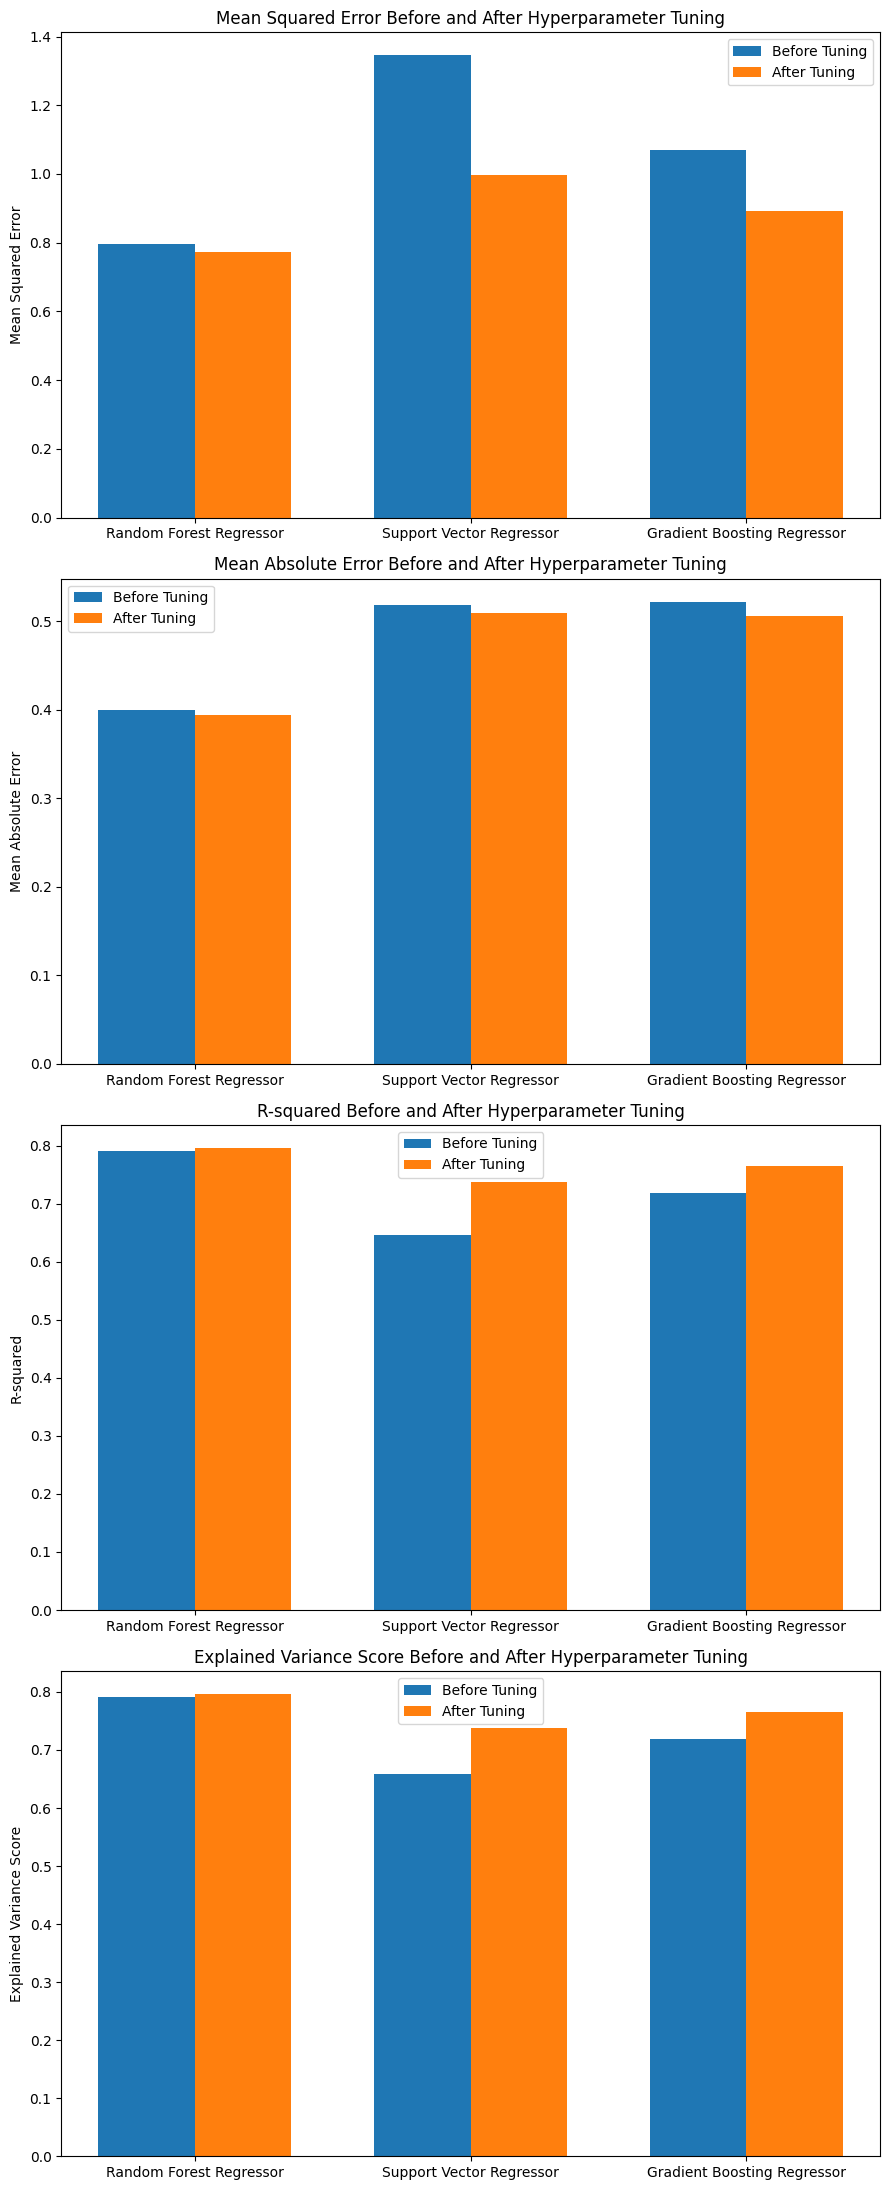

In [186]:
# Define the models, metrics, and data
models = result_df['Model']
metrics = ['Mean Squared Error', 'Mean Absolute Error', 'R-squared', 'Explained Variance Score']
data_before = [result_df[metric + ' Before'] for metric in metrics]
data_after = [result_df[metric + ' After'] for metric in metrics]

# Create a list of lists containing the data for the "Before Tuning" and "After Tuning" bars
data = [[data_before[i], data_after[i]] for i in range(len(metrics))]

# Set the width of the bars
bar_width = 0.35

# Create a bar chart
fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(9, 22))
for i, metric in enumerate(metrics):
    ax = axes[i]
    index = np.arange(len(models))
    ax.bar(index, data[i][0], bar_width, label='Before Tuning')
    ax.bar(index + bar_width, data[i][1], bar_width, label='After Tuning')
    ax.set_ylabel(metric)
    ax.set_title(metric + ' Before and After Hyperparameter Tuning')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**Random Forest Regressor:**

* After tuning, there was a slight improvement in performance. The MSE decreased to 0.774184, and the R-squared increased to 0.796140. This indicates a better fit to the data.

**Support Vector Regressor:**

* After tuning, the performance improved in terms of MSE, which decreased to 0.997253. The R-squared also improved to 0.737401. While the model still has a relatively high MSE, the improvements suggest better prediction accuracy.

**Gradient Boosting Regressor:**

* After tuning, there was a slight improvement in performance. The MSE decreased to 0.891389, and the R-squared increased to 0.765277, indicating better model fit and prediction accuracy.

In summary, hyperparameter tuning led to performance improvements in all three models. The Random Forest Regressor and Gradient Boosting Regressor exhibited better overall performance, while the Support Vector Regressor, although improved, still had relatively higher errors compared to the other models. 

# Conclusion and Summary

**Summary:**

Forecasting whether or not it will rain tomorrow and predicting the amount of rainfall are crucial tasks with applications in various fields, including agriculture, meteorology, and disaster management. In this analysis, we evaluated multiple machine learning models for both classification and regression tasks. Here is a summary of the findings:

**Classification Models (Will it rain tomorrow?):**

**1. Random Forest:** This model outperformed others, with an accuracy of 97.40%, high precision (96.37%), and recall (98.53%). It is recommended for accurate binary classification.

**2. Gradient Boosting:** While not as accurate as Random Forest, it exhibited balanced performance with an 80.77% accuracy, making it a reliable choice for classification tasks.

**3. Support Vector Machine (SVM):** SVM displayed moderate performance with an accuracy of 75.87%. Further optimization may be needed for better results.

**4. Logistic Regression:** Logistic Regression showed good performance with an accuracy of 88.58% and balanced precision and recall.

**Regression Models (Predicting Rainfall Amount):**

**1. Random Forest Regressor:** This model showed promise in predicting rainfall, with an R-squared value of 0.7961 after hyperparameter tuning. It is recommended for regression tasks due to its accuracy.

**2. Support Vector Regressor:** Although it had higher initial errors, after tuning, SVM regression improved with an R-squared value of 0.7382. It may be suitable for specific applications.

**3. Gradient Boosting Regressor:** This model, after tuning, achieved an R-squared value of 0.7653, making it a valuable choice for predicting rainfall amounts.

**Recommendations:**

**1. Random Forest for Classification:** For predicting whether it will rain tomorrow, the Random Forest classification model is recommended for its high accuracy, precision, and recall. It performs exceptionally well.

**2. Random Forest Regressor for Rainfall Prediction:** When predicting the amount of rainfall, the Random Forest Regressor is the top choice due to its high R-squared value after tuning. It offers reliable predictions.

**3. Further Evaluation:** While the recommended models are strong performers, ongoing monitoring and evaluation are essential. Weather patterns can change, and model performance may require updates to maintain accuracy.

**4. Application-Specific Models:** Consider tailoring the choice of models to specific applications. Different fields may have unique requirements and constraints.

**5. Data Quality:** Ensure the quality of input data, as it significantly impacts model performance. Continuously collect and update data to improve forecasting accuracy.

**6. Hyperparameter Tuning:** Implement hyperparameter tuning to optimize models further. This can help improve their performance and adapt them to changing conditions.

In summary, the choice of model should align with the specific requirements of the forecasting task. By selecting and continuously improving the right model, we can enhance the accuracy and reliability of weather predictions and rainfall forecasts.